In [2]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [3]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#Librerias para modelos K-means
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

#Librerias para evaluar el modelo
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#]Libreria para evitar advertencia por falta de memoria
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./mall_customers.csv')

In [5]:
#1. Analisis Exploratorio de los Datos:

data.head(50)

,ClienteID,Genero,Edad,Anual Salario(k$),Puntaje Compras (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
#Descripcion de los datos

data.describe()

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200,200,200,200
mean,100.5,38.85,60.56,50.2
std,57.8792,13.969,26.2647,25.8235
min,1,18,15,1
25%,50.75,28.75,41.5,34.75
50%,100.5,36,61.5,50
75%,150.25,49,78,73
max,200,70,137,99


Text(0.5, 1.0, 'Identificación Datos Faltantes')

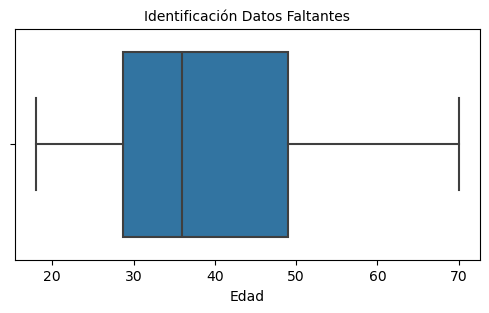

In [8]:
# Grafico para identificar valores faltantes

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Edad'])
plt.title('Identificación Datos Faltantes', fontsize=10)

In [9]:
#Revisamos Datos Faltantes

print ("Edad: ",data['Edad'].isin([0]).sum())
print ("Salario Anual: ",data['Anual Salario(k$)'].isin([0]).sum())
print ("Puntaje de Credito: ",data['Puntaje Compras (1-100)'].isin([0]).sum())

Edad:  0
Salario Anual:  0
Puntaje de Credito:  0


Text(0.5, 1.0, 'Identificación Datos Atípicos')

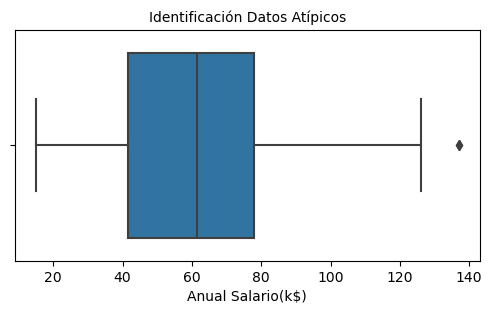

In [10]:
# Grafico para identificar valores Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Anual Salario(k$)'])
plt.title('Identificación Datos Atípicos', fontsize=10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ClienteID                200 non-null    int64 
 1   Genero                   200 non-null    object
 2   Edad                     200 non-null    int64 
 3   Anual Salario(k$)        200 non-null    int64 
 4   Puntaje Compras (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
hr_min=5
hr_max=100
total_atipicos=((data['Puntaje Compras (1-100)']<hr_min)|(data['Puntaje Compras (1-100)']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [29]:
data=data[(data['Puntaje Compras (1-100)']<hr_max)&(data['Puntaje Compras (1-100)']>hr_min)]

In [30]:
hr_min=5
hr_max=100
total_atipicos=((data['Puntaje Compras (1-100)']<hr_min)|(data['Puntaje Compras (1-100)']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


Se revisan los valores mas importantes que son la Edad, Salario y Puntaje de Credito, pero no hay valores fuera del rango normal.

In [31]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es analizar el puntaje de credito de los clientes segun su edad y el salario que ganan.

data=data[['Edad','Anual Salario(k$)','Puntaje Compras (1-100)']]

In [32]:
data.head(20)

,Edad,Anual Salario(k$),Puntaje Compras (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
9,30,19,72
10,67,19,14


<function matplotlib.pyplot.show(close=None, block=None)>

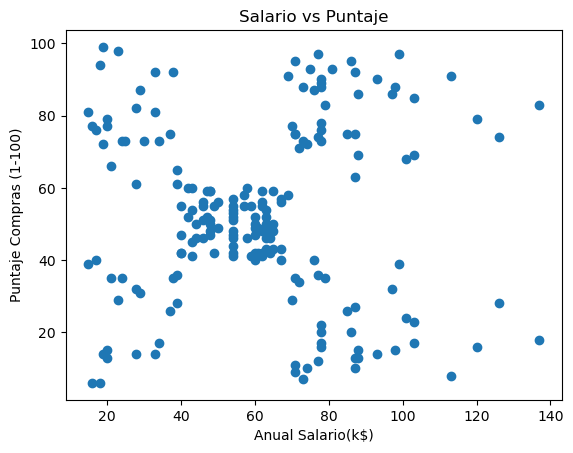

In [33]:
#Grafica del agrupamiento de datos

plt.scatter(data['Anual Salario(k$)'], data['Puntaje Compras (1-100)'])
plt.xlabel('Anual Salario(k$)')
plt.ylabel('Puntaje Compras (1-100)')
plt.title('Salario vs Puntaje')
plt.show

In [34]:
#4. Alistamos los datos para crear el Dendograma

x = data[['Anual Salario(k$)', 'Puntaje Compras (1-100)']].values
linked = linkage(x, 'average')

In [35]:
#5. Decidir el número de clústeres basado en el dendrograma y aplicar el modelo
clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
clustering.fit(x)

data['Cluster'] = clustering.labels_

In [36]:
#Calcular y mostrar las métricas de evaluación 
silhouette_avg = silhouette_score(x, clustering. labels_) 
davies_bouldin = davies_bouldin_score(x, clustering.labels_) 
calinski_harabasz = calinski_harabasz_score(x, clustering.labels_)

print(f"Coeficiente de Silueta: {silhouette_avg}") 
print(f"Índice de Davies-Bouldin: {davies_bouldin}") 
print(f"Índice Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silueta: 0.4537164368880026
Índice de Davies-Bouldin: 0.6363305175305292
Índice Calinski-Harabasz: 108.58095642864451


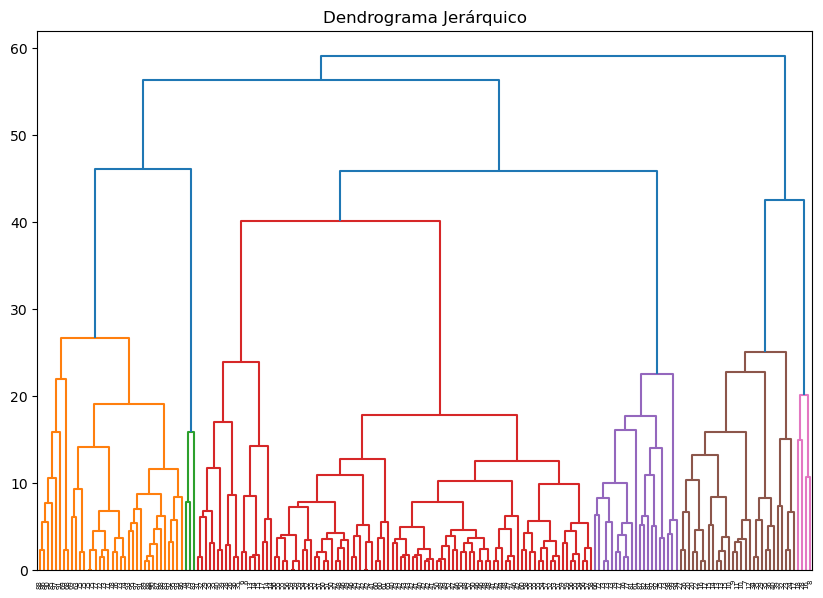

In [37]:
#6. Realizamos la grafica para el Dendograma
plt.figure(figsize=(10, 7))
dendrogram (linked,
             orientation='top',
             labels=data['Puntaje Compras (1-100)'].astype (str).values,
             distance_sort='descending',
             show_leaf_counts=True)
plt.title('Dendrograma Jerárquico')
plt.show()

#7. Interpretar, analizar y documentar los resultados obtenidos

Segun los resultados obtenidos por los calculos y la grafica podemos concluir lo siguiente:

- El coeficiente de silueta es de 0.45, por lo tanto mas del 50% de los datos quedaron por fuera y no fueron tomados por lo tanto esta muy alejado del idela que sería 1.
- El indice de Calinski es un poco alto y podemos determinar que no es el tratamiento mas apropiado para este data set.
- La grafica del dendograma nos muestra un resultado dificil de analizar debido a la separacion de la jerarquia. 